In [1]:
#let's do the model building in here
# The modules needed for building the model can be:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#add more if needed


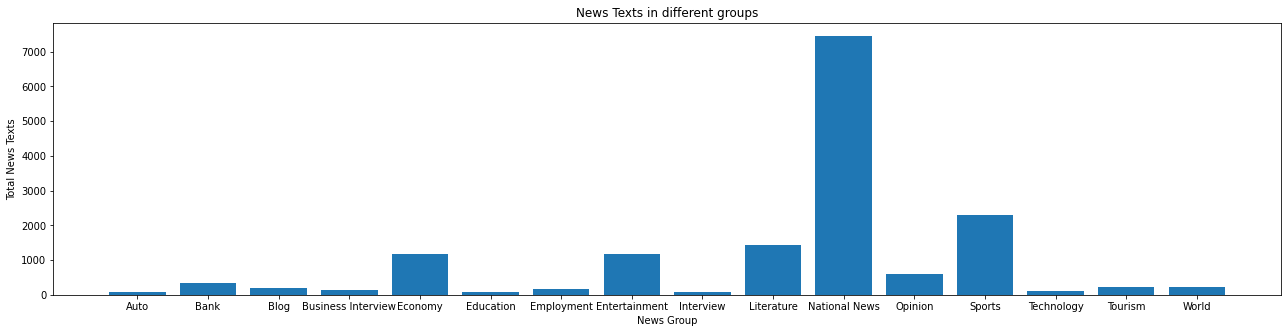

In [2]:
PARENT_PATH = "."
DATASET_PATH = ".\\16NepaliNews\\16719\\raw"

list_of_folders = os.listdir(DATASET_PATH)
no_of_files_in_folders = []
for folder in list_of_folders:
    no_of_files_in_folders.append(len(os.listdir(DATASET_PATH + "\\" + folder)))
    
    
plt.figure(figsize=(22, 5))
plt.bar(list_of_folders, no_of_files_in_folders)
plt.xlabel("News Group")
plt.ylabel("Total News Texts")
plt.title("News Texts in different groups")
plt.show()

In [117]:
for x, y in zip(list_of_folders, no_of_files_in_folders) :
    print(x , ":" , y)

Auto : 95
Bank : 351
Blog : 209
Business Interview : 142
Economy : 1188
Education : 85
Employment : 154
Entertainment : 1174
Interview : 87
Literature : 16
National News : 7452
Opinion : 590
Sports : 2285
Technology : 110
Tourism : 214
World : 212


In [67]:
#function to save the file
def save_file( text, folder_name, filename_with_extension, parent_path = "."):
    print("SAVING FILE..." + folder_name + "\\" +filename_with_extension)
    if not os.path.isdir(parent_path + "\\tokenized"): #check if the given path's folder exists or not
        os.makedirs(parent_path + "\\tokenized")
    if not os.path.isdir(parent_path + "\\tokenized\\" + folder_name): 
        os.makedirs(parent_path + "\\tokenized\\" + folder_name )
        
    with open(parent_path + "\\tokenized\\" + folder_name +"\\" + filename_with_extension, 'w', encoding='utf-8') as wp:
        wp.write(str(text))

       



In [126]:
class Preprocessing:
    def __init__(self):
       self.path = DATASET_PATH
       self.list_of_folders = os.listdir(self.path)
        
    def Tokenization(self):
        not_opened = 0
        for folder in self.list_of_folders:
            for file in os.listdir(self.path + "\\" + folder):
                with open(os.path.join(self.path, folder, file), encoding='utf-8') as fp:
                    print(folder + "\\" + file + " opened")
                    try:
                        unprocessed_text = fp.read() 
                        tokenized_text = unprocessed_text.split(" ")
                        save_file(tokenized_text, folder, file)               
                    except:
                       not_opened += 1
                       
        print(not_opened)
            

In [127]:
preprocessing_data = Preprocessing()

preprocessing_data.Tokenization()

Auto\1448443080.txt opened
SAVING FILE...Auto\1448443080.txt
Auto\1448882460.txt opened
SAVING FILE...Auto\1448882460.txt
Auto\1449985980.txt opened
SAVING FILE...Auto\1449985980.txt
Auto\1450188060.txt opened
SAVING FILE...Auto\1450188060.txt
Auto\1450190340.txt opened
SAVING FILE...Auto\1450190340.txt
Auto\1450342440.txt opened
SAVING FILE...Auto\1450342440.txt
Auto\1450771620.txt opened
SAVING FILE...Auto\1450771620.txt
Auto\1451208540.txt opened
SAVING FILE...Auto\1451208540.txt
Auto\1451278080.txt opened
SAVING FILE...Auto\1451278080.txt
Auto\1452067560.txt opened
SAVING FILE...Auto\1452067560.txt
Auto\1452239700.txt opened
SAVING FILE...Auto\1452239700.txt
Auto\1453009680.txt opened
SAVING FILE...Auto\1453009680.txt
Auto\1453607700.txt opened
SAVING FILE...Auto\1453607700.txt
Auto\1454836200.txt opened
SAVING FILE...Auto\1454836200.txt
Auto\1455782220.txt opened
SAVING FILE...Auto\1455782220.txt
Auto\1455787140.txt opened
SAVING FILE...Auto\1455787140.txt
Auto\1458146820.txt open

In [98]:

with open("rough.txt", encoding="utf-8") as fp:
        t = fp.read()
        print( t[334])


ि


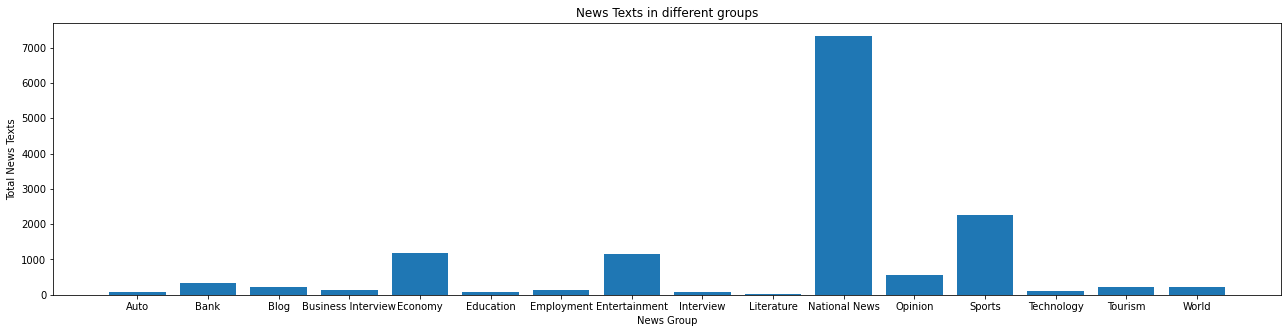

In [128]:
list_of_folders1 = os.listdir(".\\tokenized")
no_of_files_in_folders1 = []
for folder in list_of_folders:
    no_of_files_in_folders1.append(len(os.listdir(".\\tokenized" + "\\" + folder)))
    
    
plt.figure(figsize=(22, 5))
plt.bar(list_of_folders1, no_of_files_in_folders1)
plt.xlabel("News Group")
plt.ylabel("Total News Texts")
plt.title("News Texts in different groups")
plt.show()

In [131]:
count = 0
for x, y in zip(list_of_folders, no_of_files_in_folders) :
    print(x , ":" , y, no_of_files_in_folders1[count], "percent: ", abs(y - no_of_files_in_folders1[count])*100 / y)
    
    count +=1

Auto : 95 92 percent:  3.1578947368421053
Bank : 351 344 percent:  1.9943019943019944
Blog : 209 208 percent:  0.4784688995215311
Business Interview : 142 138 percent:  2.816901408450704
Economy : 1188 1176 percent:  1.0101010101010102
Education : 85 84 percent:  1.1764705882352942
Employment : 154 148 percent:  3.896103896103896
Entertainment : 1174 1164 percent:  0.8517887563884157
Interview : 87 86 percent:  1.1494252873563218
Literature : 16 16 percent:  0.0
National News : 7452 7329 percent:  1.6505636070853462
Opinion : 590 554 percent:  6.101694915254237
Sports : 2285 2268 percent:  0.7439824945295405
Technology : 110 103 percent:  6.363636363636363
Tourism : 214 211 percent:  1.4018691588785046
World : 212 209 percent:  1.4150943396226414
